In [2]:
import pandas as pd
from sklearn import metrics
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('/fast/home/cosmo/rsna-mammography/attention_MIL/predictions.csv')

In [4]:
df.cancer.value_counts()

0    42780
1      896
Name: cancer, dtype: int64

In [5]:
df['pred'] = 1.0*(df.prob>0.5)
#df['pred'] = 1.0*(df.prob>df.prob.mean())
df

,Unnamed: 0,image_id,cancer,prob,pred
0,0,462822612,0,0.000395,0.0
1,1,1459541791,0,0.000394,0.0
2,2,1864590858,0,0.003490,0.0
3,3,1874946579,0,0.002511,0.0
4,4,220375232,0,0.000630,0.0
...,...,...,...,...,...
43671,54701,1729524723,0,0.023487,0.0
43672,54702,63473691,0,0.002025,0.0
43673,54703,1078943060,0,0.002101,0.0
43674,54704,398038886,0,0.005561,0.0


In [6]:
df.prob.min(), df.prob.max()

(5.3336547e-25, 0.9999659)

AUC : 0.8076510374924865


<AxesSubplot: >

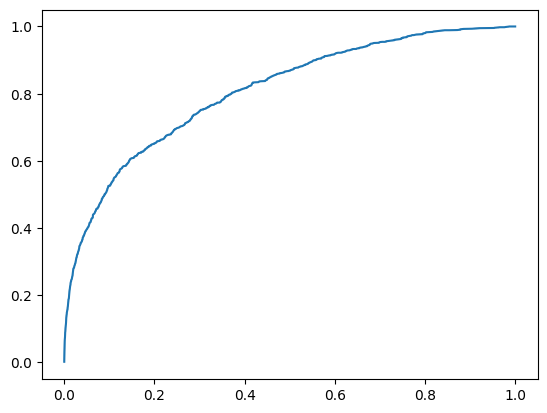

In [7]:
fpr, tpr, thresholds = metrics.roc_curve(df.cancer, df.prob, pos_label=1)
auc=metrics.auc(fpr, tpr)
print(f'AUC : {auc}')
sns.lineplot(x=fpr,y=tpr)

<AxesSubplot: xlabel='prob', ylabel='Count'>

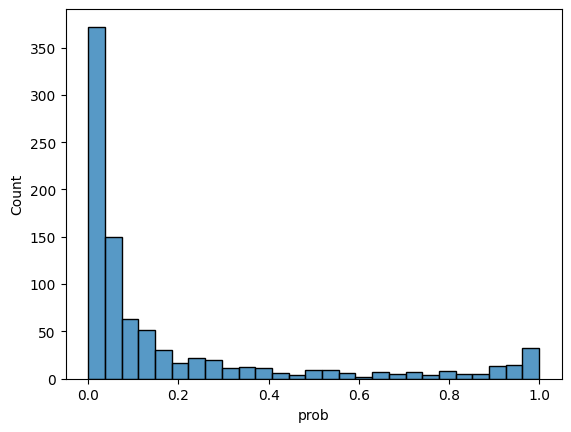

In [8]:
sns.histplot(df[df.cancer==1].prob)

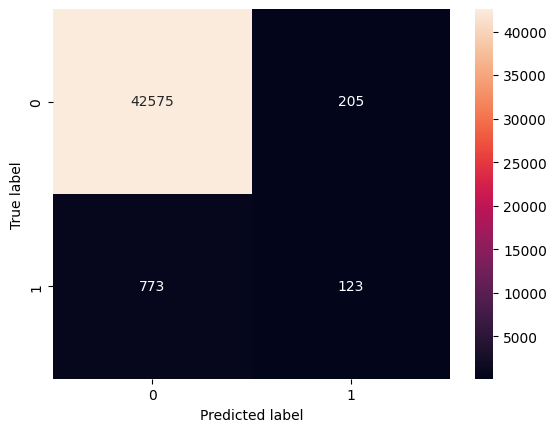

In [9]:
#labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
sns.heatmap(
    #metrics.confusion_matrix(df.cancer, df.pred),
    metrics.confusion_matrix(df.cancer, df.prob>0.5),
    annot=True, fmt='d'
)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
correctCancer = df[(df.pred==df.cancer) & (df.cancer==1)]
del correctCancer['Unnamed: 0']
correctCancer.to_csv('/fast/rsna-breast/tables/correct123.csv')

# Round two 
### a model trained with the 123 correctly-classified instances above removed

In [22]:
df2 = pd.read_csv('/fast/home/cosmo/rsna-mammography/attention_MIL/predictions-2.csv')
df2['pred'] = 1.0*(df2.prob>0.5)

AUC : 0.8002998584169919


<AxesSubplot: >

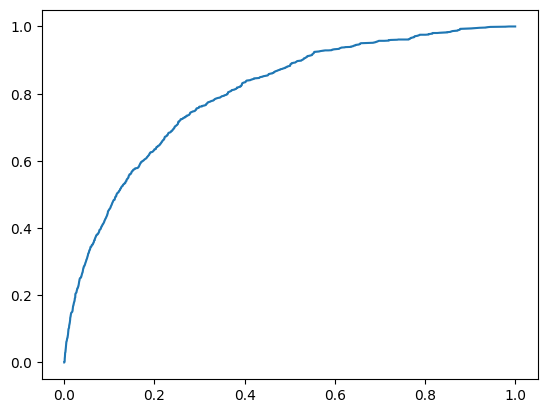

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(df2.cancer, df2.prob, pos_label=1)
auc=metrics.auc(fpr, tpr)
print(f'AUC : {auc}')
sns.lineplot(x=fpr,y=tpr)

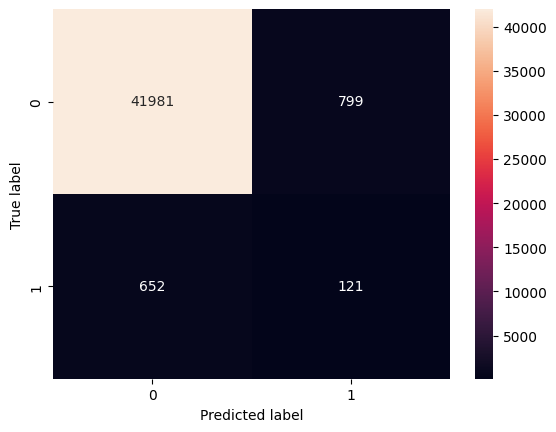

In [31]:
# labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
sns.heatmap(
    #metrics.confusion_matrix(df.cancer, df.pred),
    metrics.confusion_matrix(df2.cancer, df2.prob>0.5),
    annot=True, fmt='d'
)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
correctCancer2 = df2[(df2.pred==df2.cancer) & (df2.cancer==1)]
del correctCancer2['Unnamed: 0']
correctCancer2.to_csv('/fast/rsna-breast/tables/correct_stage2.csv')

In [ ]:
# merge the results together

In [27]:
dfm = pd.concat([df,df2]).groupby('image_id').max()
dfm

,Unnamed: 0,cancer,prob,pred
image_id,,,,
68491,18887,0,0.073886,0.0
127964,13448,0,0.017102,0.0
193459,22857,0,0.014986,0.0
225973,827,0,0.221712,0.0
249677,13658,0,0.007233,0.0
...,...,...,...,...
2147266534,36145,0,0.002846,0.0
2147293172,53694,0,0.007467,0.0
2147355367,23227,0,0.200425,0.0


In [24]:
dfm.pred.value_counts()

0.0    42488
1.0     1128
2.0       60
Name: pred, dtype: int64

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(dfm.cancer, dfm.prob, pos_label=1)
auc=metrics.auc(fpr, tpr)
print(f'AUC : {auc}')
#sns.lineplot(x=fpr,y=tpr)

AUC : 0.834163382108629
